# Visualization of Word Embeddings

In [60]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors
import numpy as np

Load model

In [61]:
# pre-trained model
model_path = 'models/pretrained/word2vec/GoogleNews-vectors-negative300.bin.gz'  

model = KeyedVectors.load_word2vec_format(model_path, binary=True)

Define words and embeddings

In [62]:
# Define the words to visualize
words_to_visualize = ['king', 'queen', 'man', 'woman', 'apple', 'banana', 'car', 'bike', 'love', 'hate', 'dog', 'cat']

# Get the embeddings for the selected words
embeddings = []
words = []
for word in words_to_visualize:
    if word in model:
        words.append(word)
        embeddings.append(model[word])
    else:
        print(f"Word {word} not found in the model.")

embeddings = np.array(embeddings)

PCA (2D)

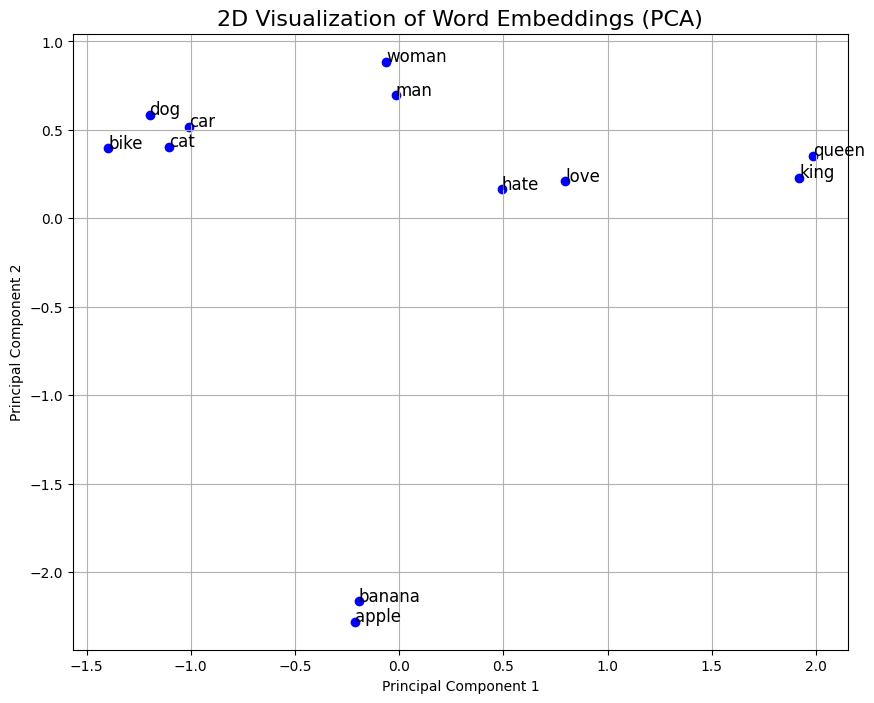

In [63]:
# Option 1: Use PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue')

# Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=12)

# Adding title and labels
plt.title("2D Visualization of Word Embeddings (PCA)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


TSNE (2D)

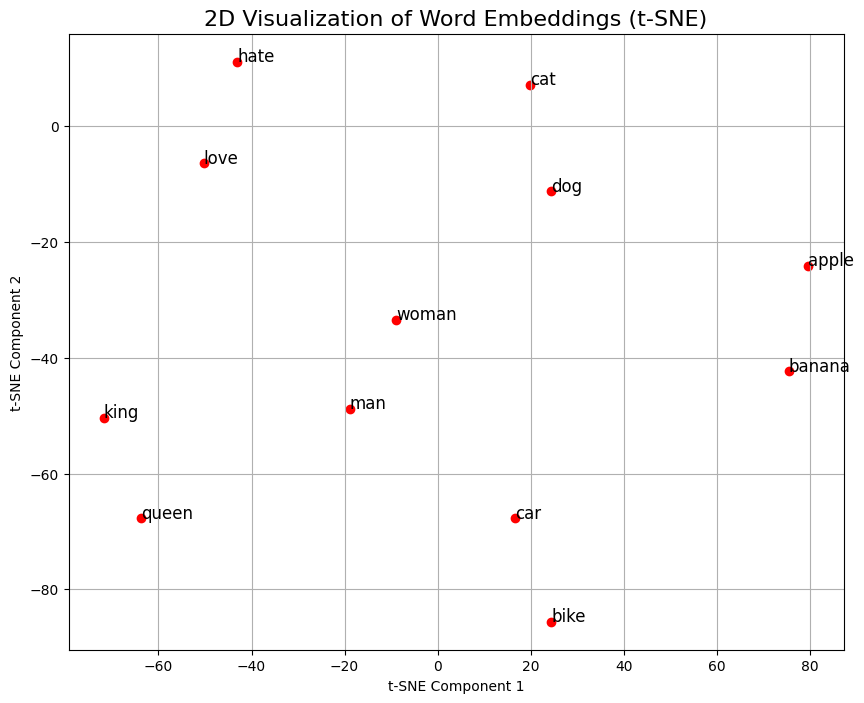

In [64]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
tsne_result = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color='red')
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=12)


plt.title("2D Visualization of Word Embeddings (t-SNE)", fontsize=16)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()